#***Topic - Bank Customer Churn Analysis using Machine Learning Model***

#**Problem Statement :**

Churn prediction model to find out customers who are likely to churn out of business.

<h1 style="color:#323232;font-size:60px;font-family:Georgia;text-align:center;"><strong>About <strong style="color:#2c2bce;font-size:50px;font-family:Georgia;">Of <strong style="color:#323232;font-size:60px;font-family:Georgia;">The <strong style="color:#2c2bce;font-size:50px;font-family:Georgia;">Dataset <strong style="color:#323232;font-size:60px;font-family:Georgia;">:</strong></strong></strong></strong></strong></h1>

<p style="background-color:#FFFFF;font-family:Georgia;color:#2c2bce;font-size:125%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#323232;"><br>1.CLIENTNUM - Client number. Unique identifier for the customer holding the account.<br>
2.Attrition_Flag - Internal event (customer activity) variable - if the account is closed then 1 else 0.<br>
3.Customer_Age -Demographic variable - Customer's Age in Years.<br>
4.Gender - Demographic variable - M=Male, F=Female.<br>
5.Dependent_count - Demographic variable - Number of dependents.<br>
6.Education_Level - Demographic variable - Educational Qualification of the account holder (example: high school).<br>
7.Marital_Status - Demographic variable - Married, Single, Divorced, Unknown.<br>
8.Income_Category - Demographic variable - Annual Income Category of the account holder.<br>
9.Card_Category - Product Variable - Type of Card (Blue, Silver, Gold, Platinum).<br>
10.Months_on_book - Period of relationship with bank.<br>
11.Total_Relationship_Count-Total no. of products held by the customer.<br>
12.Months_Inactive_12_mon - No. of months inactive in the last 12 months.<br>
13.Contacts_Count_12_mon-No. of Contacts in the last 12 months.<br>
14.Credit_Limit-Credit Limit on the Credit Card.<br>
15.Total_Revolving_Bal-Total Revolving Balance on the Credit Card.<br>
16.Avg_Open_To_Buy-Open to Buy Credit Line (Average of last 12 months).<br>
17.Total_Amt_Chng_Q4_Q1- Open to Buy Credit Line (Average of last 12 months).<br>
18.Total_Trans_Amt-Total Transaction Amount (Last 12 months).<br>
19.Total_Trans_Ct- Total Transaction Count (Last 12 months).<br>
20.Total_Ct_Chng_Q4_Q1-Change in Transaction Count (Q4 over Q1).<br>
21.Avg_Utilization_Ratio-Average Card Utilization Ratio.<br>
22.Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1. <br>
23.Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
    </p>

<h1 style="color:#323232;font-size:60px;font-family:Georgia;text-align:center;"><strong>Contents <strong style="color:#2c2bce;font-size:50px;font-family:Georgia;">Of <strong style="color:#323232;font-size:60px;font-family:Georgia;">The <strong style="color:#2c2bce;font-size:50px;font-family:Georgia;">Notebook <strong style="color:#323232;font-size:60px;font-family:Georgia;">:</strong></strong></strong></strong></strong></h1>

   
* [1. Import all the necessary libraries](#1)
* [2. Import Dataset.](#2)  
* [3. Read the dataset](#3)
* [4. Basic analysis of the dataset](#4)      
* [5. Exploratory data analysis (EDA)](#5)    
* [6. Factors that affecting churn rate - analysed using charts](#6)       
* [7. Declare feature vector and target variable](#7)    
* [8. Split data into separate training and test set](#8)    
* [9. Split data into separate training and test set](#9)  
* [10. Feature Scaling](#10)  
* [11. MODEL TRAINING USING ALL MODELS TOGETHER](#11)
* [12. HYPER PARAMETER TUNING](#12)        
* [13. FINALLY TRAINING THE MODEL WITH BEST HYPER PARAMETERS](#13)    
* [14. FEATURE SELECTION - GETTING BEST MODEL FEATURES](#14)   
* [15. Confusion matrix](#15)      
* [16. Classification Report](#16)          
* [17. Findings](#17)   
* [18. Business Recommendations](#18)
* [19. Conclusion](#19)      

# *1.Import all the necessary libraries*

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

#*2.Import Dataset*

In [ ]:
# Upload the CSV file
from google.colab import files
uploaded = files.upload()

Saving BankChurners.csv to BankChurners.csv


#*3.Read the dataset*

In [ ]:
# Read the CSV file into a DataFrame
data = 'BankChurners.csv'
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#*4.Basic analysis of the dataset*

In [ ]:
# print the shape , (rows ,columns)
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (10127, 23)


In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
# Creating the 'Age' category column
df['Age_Category'] = 0

df.loc[(df['Customer_Age'] > 25) & (df['Customer_Age'] <= 35), 'Age_Category'] = '25-35'
df.loc[(df['Customer_Age'] > 35) & (df['Customer_Age'] <= 45), 'Age_Category'] = '35-45'
df.loc[(df['Customer_Age'] > 45) & (df['Customer_Age'] <= 55), 'Age_Category'] = '45-55'
df.loc[(df['Customer_Age'] > 55) & (df['Customer_Age'] <= 65), 'Age_Category'] = '55-65'
df.loc[df['Customer_Age'] > 65, 'Age_Category'] = '65+'

In [ ]:
df['Age_Category'].value_counts()

Age_Category
45-55    4135
35-45    3742
55-65    1321
25-35     919
65+        10
Name: count, dtype: int64

In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [ ]:
# Drop the column named 'column_to_drop'
df = df.drop('Customer_Age',axis = 1)
df = df.drop('CLIENTNUM', axis=1)
df = df.drop('Total_Ct_Chng_Q4_Q1', axis=1)
df = df.drop('Avg_Utilization_Ratio', axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1)

In [ ]:
df.shape

(10127, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

#*5.Exploratory data analysis (EDA)*

#*5.1.Removing Duplicates*

In [ ]:
#Finding the duplicates from dataset...
df[df.duplicated()]
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(10127, 18)

#*5.2.Missing value treatment*

In [ ]:
df.columns

Index(['Attrition_Flag', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Age_Category'],
      dtype='object')

In [ ]:
categorical = [x for x in df.columns if df[x].dtype=='O'] ## list comprehension  ## checking for the datatype of the column

print('There are {} categorical variables\n'.format(len(categorical)))  ## how many categorical var are there

print('The categorical variables are :\n\n', categorical)

There are 7 categorical variables

The categorical variables are :

 ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Age_Category']


In [ ]:
##To check if there is any null or unknown values in the lable

#df.Attrition_Flag.value_counts()
#df.Gender.value_counts()
#df.Education_Level.value_counts()
#df.Marital_Status.value_counts()
#df.Income_Category.value_counts()
#df.Card_Category.value_counts()

In [ ]:
#Storing all the categorical variable in X by looping function so we can easily access the categorical variables

for x in categorical:            ### for loop

    print(df[x].value_counts())  ## gives you the count of rows for each category of a column

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Gender
F    5358
M    4769
Name: count, dtype: int64
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
Age_Category
45-55    4135
35-45    3742
55-65    1321
25-35     919
65+        10
Name: count, dtype: int64


In [ ]:
#Converting unknown values into NaN values so we can replace NaN with mode values

df['Education_Level'].replace('Unknown', np.NaN, inplace=True)

In [ ]:
#Converting unknown values into NaN values so we can replace NaN with mode values

df['Marital_Status'].replace('Unknown', np.NaN, inplace=True)

In [ ]:
#Converting unknown values into NaN values so we can replace NaN with mode values

df['Income_Category'].replace('Unknown', np.NaN, inplace=True)

In [ ]:
df.isnull().sum()

Attrition_Flag                 0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Age_Category                   0
dtype: int64

In [ ]:
#Now we are treating the null values by replacing the mode values

df['Education_Level'].fillna(df['Education_Level'].mode()[0], inplace=True)

In [ ]:
#Now we are treating the null values by replacing the mode values

df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)

In [ ]:
#Now we are treating the null values by replacing the mode values

df['Income_Category'].fillna(df['Income_Category'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Attrition_Flag              0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Age_Category                0
dtype: int64

#*6.Factors that affecting churn rate - analysed using charts*

#*6.1 Attrition_Flag - Pie Chart*

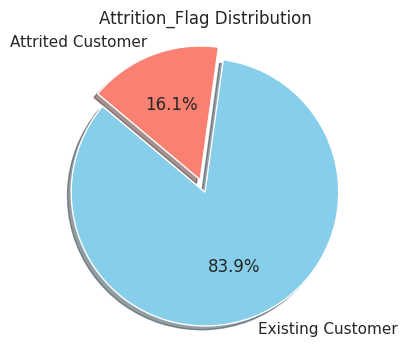

In [ ]:
# Calculate the distribution
distribution = df['Attrition_Flag'].value_counts()
# Plotting the pie chart
labels = distribution.index
sizes = distribution.values
colors = ['skyblue', 'salmon']
explode = (0.1, 0)  # explode the first slice (Existing Customer)

plt.figure(figsize=(4,4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Attrition_Flag Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#*6.2 Gender - Pie Chart*

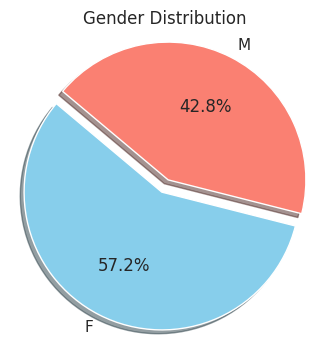

In [ ]:
# Filter the DataFrame to include only attrited customers
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Calculate the distribution by education level
Gender_distribution = attrited_customers['Gender'].value_counts()

# Plotting the pie chart
labels = Gender_distribution.index
sizes = Gender_distribution.values
colors = ['skyblue', 'salmon']
explode = (0.1, 0)  # explode the first slice (Existing Customer)

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#*6.3.1 Education_Level - Bar Chart*

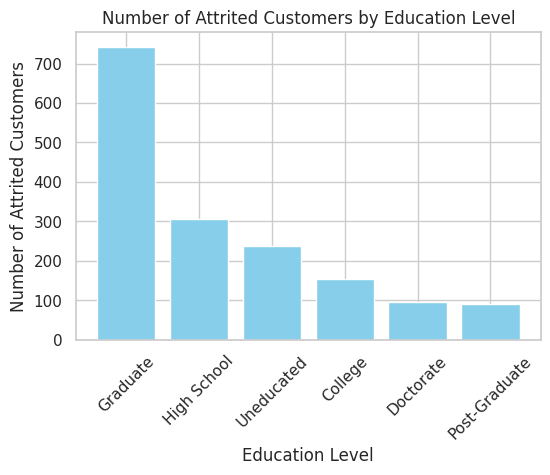

In [ ]:
# Filter the DataFrame to include only attrited customers
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Calculate the distribution by education level
Education_Level_distribution = attrited_customers['Education_Level'].value_counts()

# Plotting the bar chart
labels = Education_Level_distribution.index
sizes = Education_Level_distribution.values

plt.figure(figsize=(6, 4))
plt.bar(labels, sizes, color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Number of Attrited Customers')
plt.title('Number of Attrited Customers by Education Level')
plt.xticks(rotation=45)
plt.show()

#*6.3.2 Education_Level - Pie Chart*

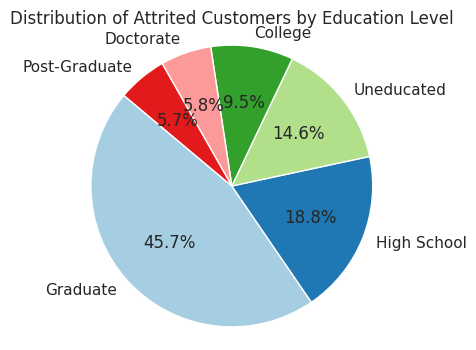

In [ ]:
# Filter the DataFrame to include only attrited customers
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Calculate the distribution by education level
Education_Level_distribution = attrited_customers['Education_Level'].value_counts()

# Plotting the pie chart
labels = Education_Level_distribution.index
sizes = Education_Level_distribution.values

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Attrited Customers by Education Level')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#*6.4.1 Marital_Status - Bar Chart*

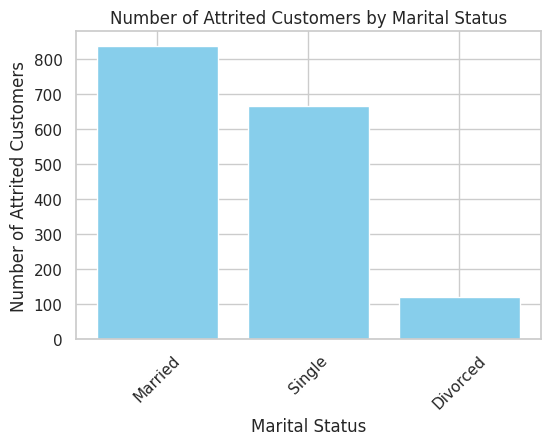

In [ ]:
# Filter the DataFrame to include only attrited customers
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Calculate the distribution by education level
Marital_Status_distribution = attrited_customers['Marital_Status'].value_counts()

# Plotting the bar chart
labels = Marital_Status_distribution.index
sizes = Marital_Status_distribution.values

plt.figure(figsize=(6, 4))
plt.bar(labels, sizes, color='skyblue')
plt.xlabel('Marital Status')
plt.ylabel('Number of Attrited Customers')
plt.title('Number of Attrited Customers by Marital Status')
plt.xticks(rotation=45)
plt.show()

#*6.4.2 Marital_Status - Pie Chart*

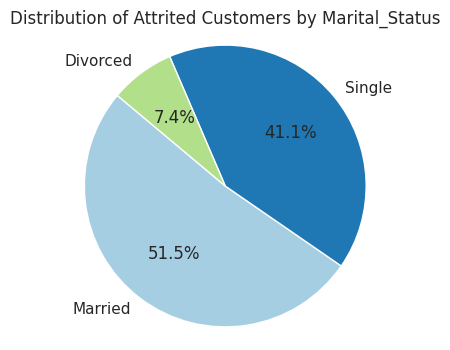

In [ ]:
# Filter the DataFrame to include only attrited customers
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Calculate the distribution by education level
Marital_Status_distribution = attrited_customers['Marital_Status'].value_counts()

# Plotting the pie chart
labels = Marital_Status_distribution.index
sizes = Marital_Status_distribution.values

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Attrited Customers by Marital_Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#*6.5.1 Income_Category - Bar Chart*

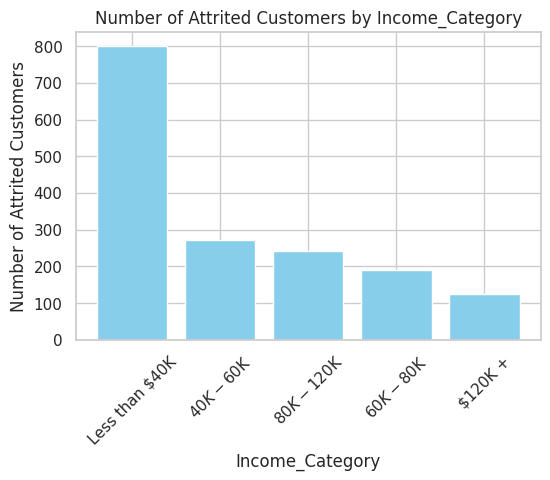

In [ ]:
# Filter the DataFrame to include only attrited customers
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Calculate the distribution by education level
Income_Category_distribution = attrited_customers['Income_Category'].value_counts()

# Plotting the bar chart
labels = Income_Category_distribution.index
sizes = Income_Category_distribution.values

plt.figure(figsize=(6, 4))
plt.bar(labels, sizes, color='skyblue')
plt.xlabel('Income_Category')
plt.ylabel('Number of Attrited Customers')
plt.title('Number of Attrited Customers by Income_Category')
plt.xticks(rotation=45)
plt.show()

#*6.5.2 Income_Category - Pie Chart*

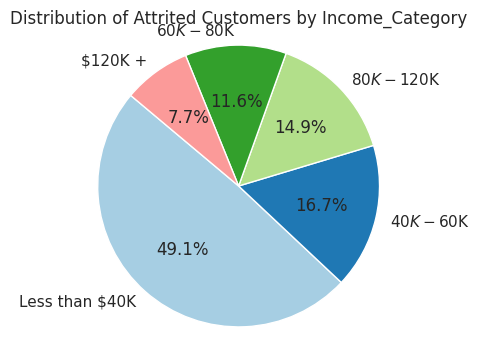

In [ ]:
# Filter the DataFrame to include only attrited customers
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Calculate the distribution by education level
Income_Category_distribution = attrited_customers['Income_Category'].value_counts()

# Plotting the pie chart
labels = Income_Category_distribution.index
sizes = Income_Category_distribution.values

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Attrited Customers by Income_Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#*6.6.1 Card_Category - Bar Chart*

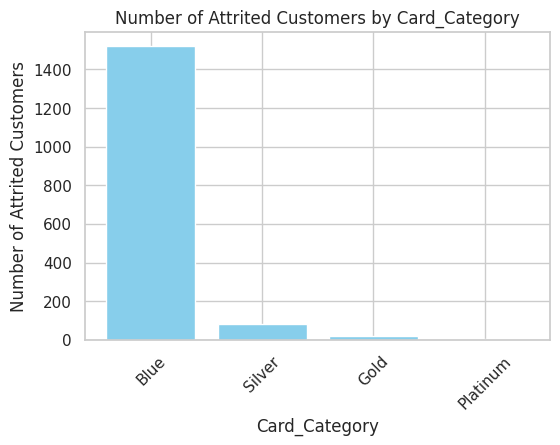

In [ ]:
# Filter the DataFrame to include only attrited customers
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Calculate the distribution by education level
Card_Category_distribution = attrited_customers['Card_Category'].value_counts()

# Plotting the bar chart
labels = Card_Category_distribution.index
sizes = Card_Category_distribution.values

plt.figure(figsize=(6, 4))
plt.bar(labels, sizes, color='skyblue')
plt.xlabel('Card_Category')
plt.ylabel('Number of Attrited Customers')
plt.title('Number of Attrited Customers by Card_Category')
plt.xticks(rotation=45)
plt.show()

#*6.6.2 Card_Category - Pie Chart*

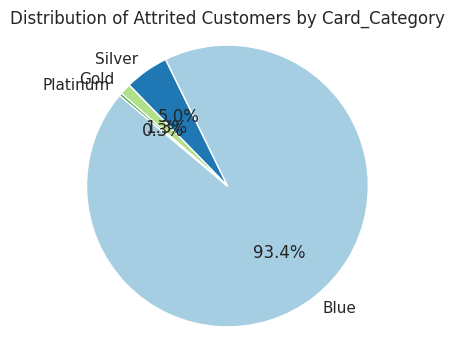

In [ ]:
# Filter the DataFrame to include only attrited customers
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Calculate the distribution by education level
Card_Category_distribution = attrited_customers['Card_Category'].value_counts()

# Plotting the pie chart
labels = Card_Category_distribution.index
sizes = Card_Category_distribution.values

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Attrited Customers by Card_Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#*6.7.1 Age_Category - Bar Chart*

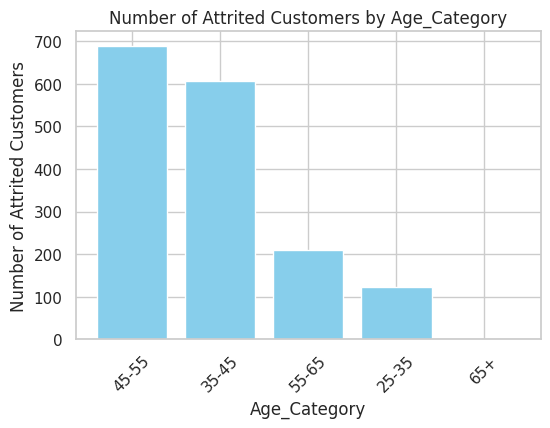

In [ ]:
# Filter the DataFrame to include only attrited customers
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Calculate the distribution by education level
Age_Category_distribution = attrited_customers['Age_Category'].value_counts()

# Plotting the bar chart
labels = Age_Category_distribution.index
sizes = Age_Category_distribution.values

plt.figure(figsize=(6, 4))
plt.bar(labels, sizes, color='skyblue')
plt.xlabel('Age_Category')
plt.ylabel('Number of Attrited Customers')
plt.title('Number of Attrited Customers by Age_Category')
plt.xticks(rotation=45)
plt.show()

#*6.7.2 Age_Category - Pie Chart*

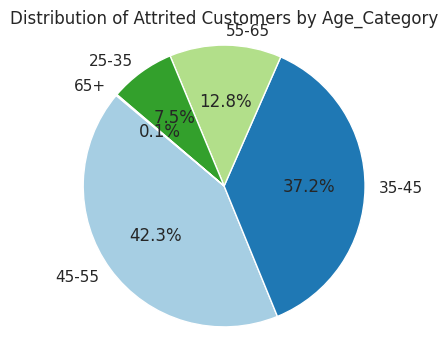

In [ ]:
# Filter the DataFrame to include only attrited customers
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Calculate the distribution by education level
Age_Category_distribution = attrited_customers['Age_Category'].value_counts()

# Plotting the pie chart
labels = Age_Category_distribution.index
sizes = Age_Category_distribution.values

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Attrited Customers by Age_Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#*5.2.3.Categorical variable treatment*

In [ ]:
# check for cardinality in categorical variables

for var in categorical:  ### checking the cardinality : no. of categories or labels or unique values in each categorical column

    print(var, ' contains ', df[var].nunique(), ' labels')

Attrition_Flag  contains  2  labels
Gender  contains  2  labels
Education_Level  contains  6  labels
Marital_Status  contains  3  labels
Income_Category  contains  5  labels
Card_Category  contains  4  labels
Age_Category  contains  5  labels


In [ ]:
df.head()

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Age_Category
0,Existing Customer,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,35-45
1,Existing Customer,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,45-55
2,Existing Customer,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,45-55
3,Existing Customer,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,35-45
4,Existing Customer,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,35-45


In [ ]:
df.describe(include='all')  ## for all the variables : numerical as well as string

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Age_Category
count,10127,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127
unique,2,2,NaN,6,3,5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,Existing Customer,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-55
freq,8500,5358,NaN,4647,5436,4673,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4135
mean,NaN,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,NaN
std,NaN,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,NaN
50%,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,NaN
75%,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,NaN


In [ ]:
# Initialize LabelEncoder

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding

df['Attrition_Flag'] = label_encoder.fit_transform(df['Attrition_Flag'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Education_Level'] = label_encoder.fit_transform(df['Education_Level'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df['Income_Category'] = label_encoder.fit_transform(df['Income_Category'])
df['Card_Category'] = label_encoder.fit_transform(df['Card_Category'])
df['Age_Category'] = label_encoder.fit_transform(df['Age_Category'])
df.head()

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Age_Category
0,1,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1
1,1,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,2
2,1,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2
3,1,0,4,3,1,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,1
4,1,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,1


In [ ]:
df.describe(include='all')  ## for all the variables : numerical as well as string

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Age_Category
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,0.470919,2.346203,2.496593,1.315493,2.754123,0.179816,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,1.581416
std,0.367235,0.499178,1.298908,1.386485,0.603090,1.375765,0.693039,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.831713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,1.000000
50%,1.000000,0.000000,2.000000,2.000000,1.000000,3.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,2.000000
75%,1.000000,1.000000,3.000000,3.000000,2.000000,4.000000,0.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,2.000000
max,1.000000,1.000000,5.000000,5.000000,2.000000,4.000000,3.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,4.000000


In [ ]:
df.shape

(10127, 18)

#*7.Declare feature vector and target variable*

In [ ]:
#Spliting X and Y

X = df.drop(['Attrition_Flag'], axis=1) ## independent variable

y = df['Attrition_Flag']  ## dependent or target -- trying to predict

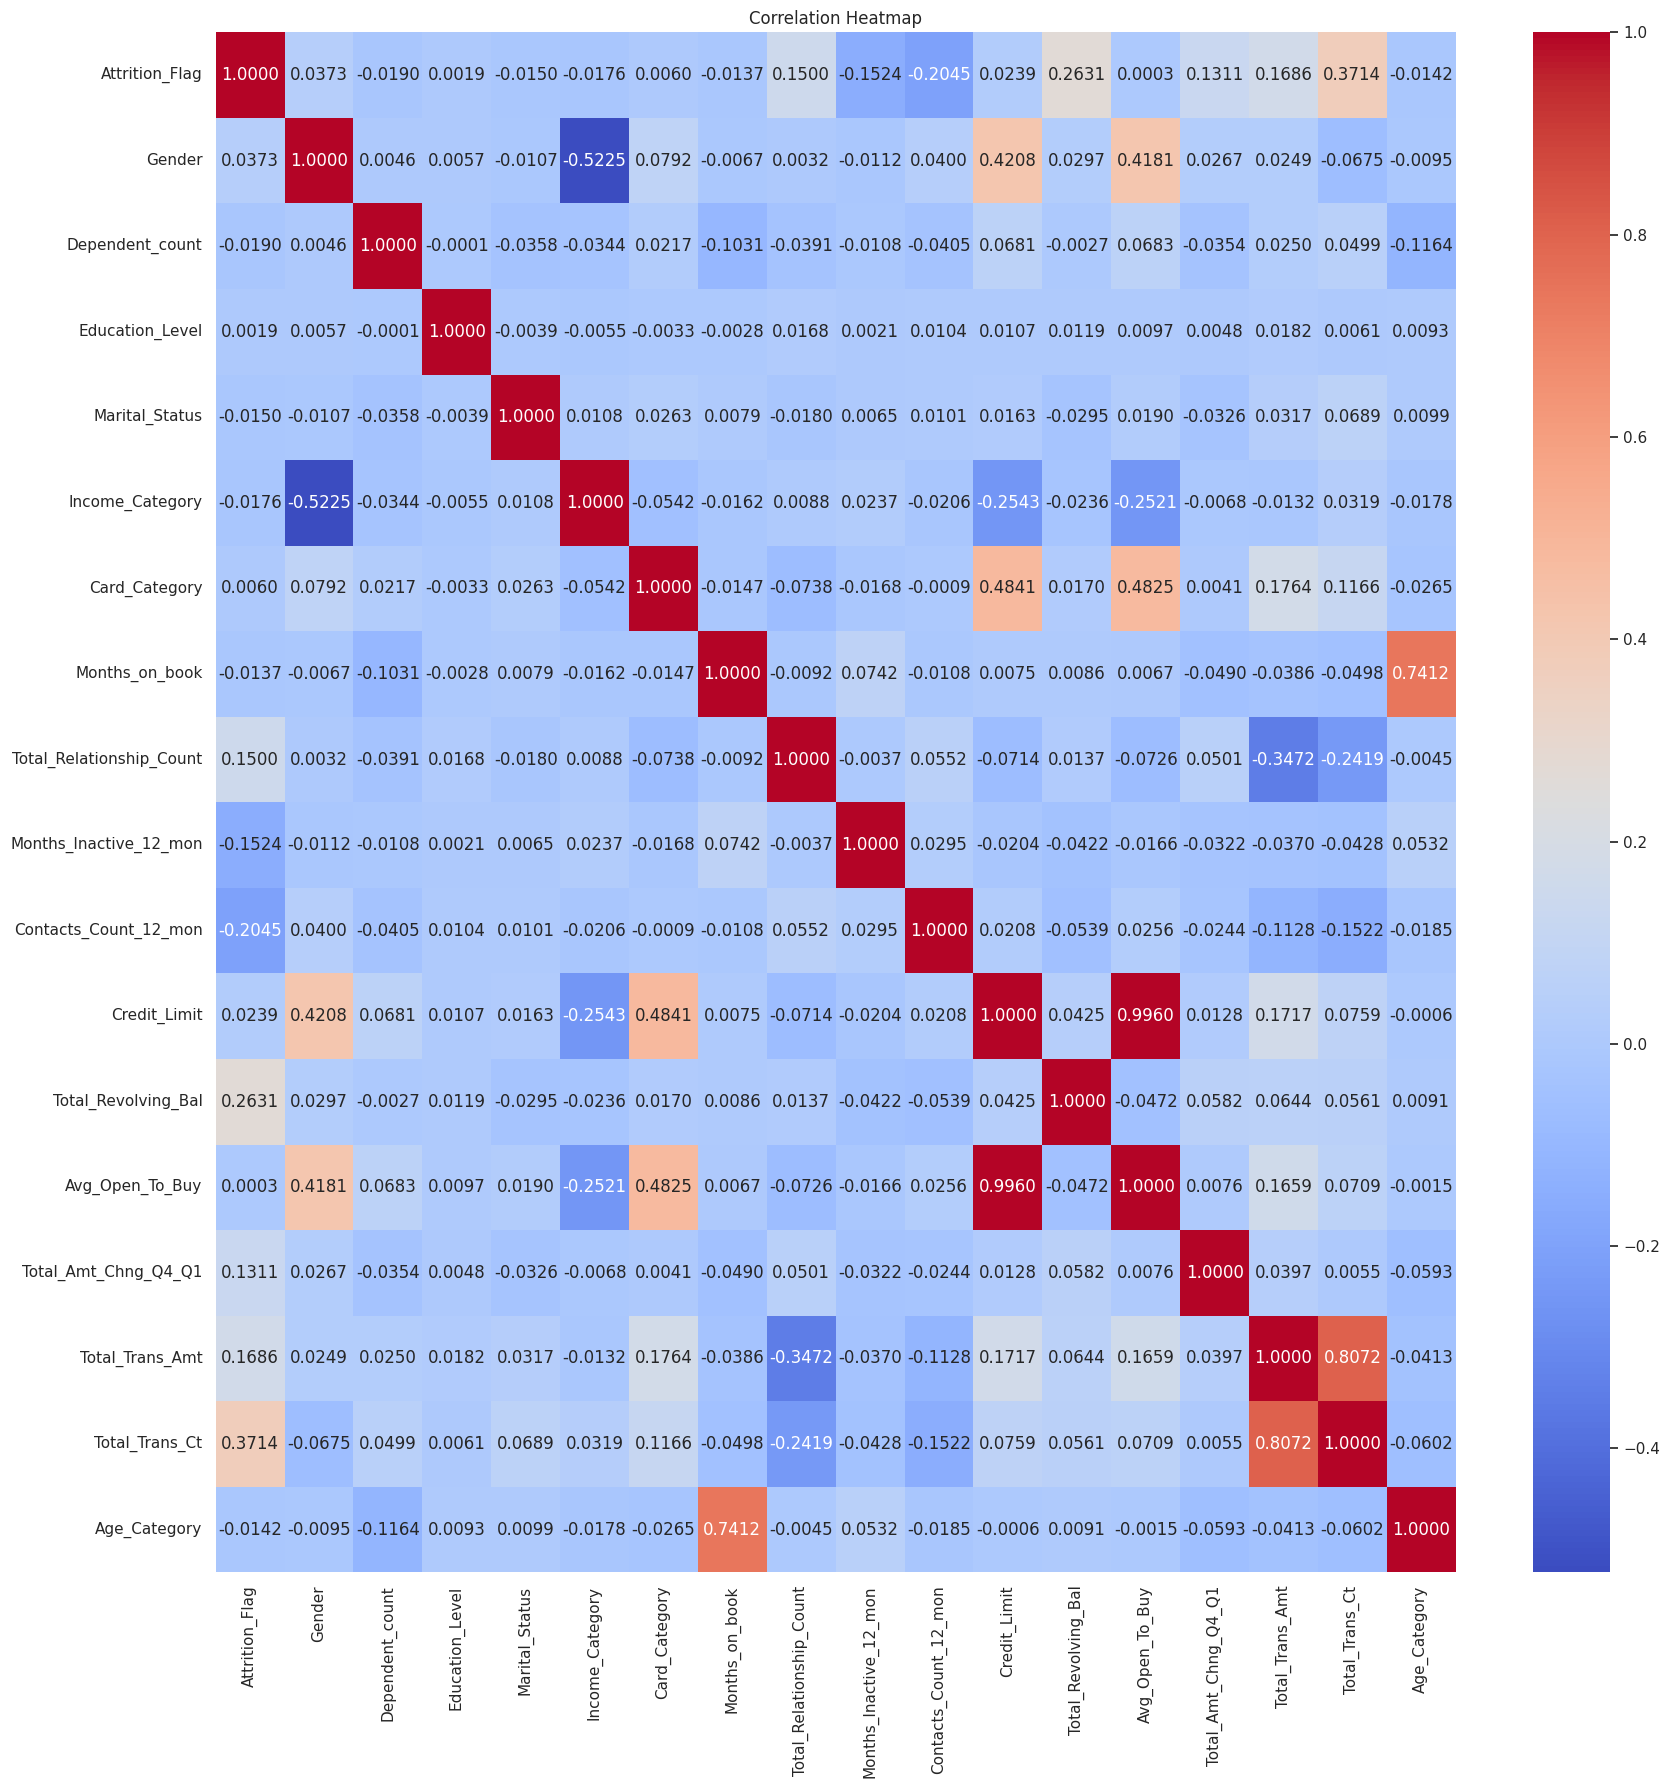

In [ ]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".4f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#*8.Split data into separate training and test set*

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape, y_train.shape,y_test.shape

((7088, 17), (3039, 17), (7088,), (3039,))

#*9.Class imbalance treatment*

In [ ]:
#checking the target variable if there any imbalance
df.Attrition_Flag.value_counts()

Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64

In [ ]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler


# Check class distribution before oversampling
print("Before oversampling:", Counter(y_train))

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Check class distribution after oversampling
print("After oversampling:", Counter(y_resampled))

Before oversampling: Counter({1: 5917, 0: 1171})
After oversampling: Counter({1: 5917, 0: 5917})


In [ ]:
y_train.head()

4813    1
9887    1
4191    1
7527    1
5081    1
Name: Attrition_Flag, dtype: int64

#*10.Feature Scaling*

In [ ]:
cols = X_train.columns
cols

Index(['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Age_Category'],
      dtype='object')

In [ ]:
df.head()

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Age_Category
0,1,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1
1,1,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,2
2,1,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2
3,1,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,1
4,1,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,1


In [ ]:
df.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,0.470919,2.346203,2.496593,1.315493,2.754123,0.179816,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695
std,0.367235,8.016814,0.499178,1.298908,1.386485,0.603090,1.375765,0.693039,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000
25%,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000
50%,1.000000,46.000000,0.000000,2.000000,2.000000,1.000000,3.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000
75%,1.000000,52.000000,1.000000,3.000000,3.000000,2.000000,4.000000,0.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000
max,1.000000,73.000000,1.000000,5.000000,5.000000,2.000000,4.000000,3.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((7088, 17), (7088,), (3039, 17), (3039,))

In [ ]:
X_train.head()

,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Age_Category
0,1.0,0.0,0.0,-1.0,0.0,0.0,0.500,1.0,-1.0,1.0,1.408589,-0.035001,1.400374,-0.414097,-0.107680,-0.314286,0.0
1,1.0,-0.5,0.0,1.0,-0.5,0.0,1.500,0.0,3.0,2.0,0.015167,-0.031699,-0.001285,0.651982,4.550753,1.028571,0.0
2,0.0,1.0,3.0,0.0,0.5,0.0,-0.375,0.5,0.0,1.0,-0.201476,-0.301800,-0.171322,0.863436,0.318796,0.285714,-1.0
3,0.0,0.5,0.0,0.0,0.5,0.0,0.375,-0.5,-1.0,0.0,0.175325,0.305762,0.100035,-0.691630,0.145504,-0.114286,0.0
4,1.0,1.0,-2.0,-1.0,-1.5,0.0,0.625,-0.5,-1.0,-1.0,0.297827,-0.046888,0.285614,-0.343612,-0.248167,-0.257143,0.0


In [ ]:
df.describe()

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Age_Category
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,0.470919,2.346203,2.496593,1.315493,2.754123,0.179816,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,1.581416
std,0.367235,0.499178,1.298908,1.386485,0.603090,1.375765,0.693039,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.831713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,1.000000
50%,1.000000,0.000000,2.000000,2.000000,1.000000,3.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,2.000000
75%,1.000000,1.000000,3.000000,3.000000,2.000000,4.000000,0.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,2.000000
max,1.000000,1.000000,5.000000,5.000000,2.000000,4.000000,3.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,4.000000


#*11.MODEL TRAINING USING ALL MODELS TOGETHER*

In [ ]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score #,plot_confusion_matrix
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),    ## BASIC BUT FAST BOOSTING TECHNIQUE
    'Bagging': BaggingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),  ## TREE BASED CLASSIFIER
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),    ## SUPPORT VECTOR MACHINES
    'KNN': KNeighborsClassifier(),   ## K NEAREST NEIGHBOURS
    'Naive Bayes': GaussianNB()     ## PROBABILITY BASED APPROACH
}

# Dictionaries to store results
results_train = {}
results_test = {}

# K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, clf in classifiers.items():
    # Cross-validation
    cv_results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
    results_train[name] = {
        'CrossVal_Score_Mean': cv_results.mean(),
        'CrossVal_Error': cv_results.std()
    }

    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    # Evaluate the predictions
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    clf_report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store the evaluation metrics
    results_test[name] = {
        'Accuracy': accuracy,
        'F1_Score': f1,
        'ROC_AUC_Score': roc_auc,
        'Classification_Report': clf_report,
        'Confusion_Matrix': cm
    }

# Print the cross-validation results
for name, result in results_train.items():
    print(f"{name} (Training):")
    print(f"  CrossVal_Score_Mean: {result['CrossVal_Score_Mean']:.4f}")
    print(f"  CrossVal_Error: {result['CrossVal_Error']:.4f}")
    print()

# Print the test results
for name, result in results_test.items():
    print(f"{name} (Test):")
    print(f"  Accuracy: {result['Accuracy']:.4f}")
    print(f"  F1_Score: {result['F1_Score']:.4f}")
    print(f"  ROC_AUC_Score: {result['ROC_AUC_Score']}")
    print(f"  Classification_Report:\n{result['Classification_Report']}")
    print(f"  Confusion_Matrix:\n{result['Confusion_Matrix']}\n")


Logistic Regression (Training):
  CrossVal_Score_Mean: 0.8966
  CrossVal_Error: 0.0089

Random Forest (Training):
  CrossVal_Score_Mean: 0.9571
  CrossVal_Error: 0.0050

AdaBoost (Training):
  CrossVal_Score_Mean: 0.9529
  CrossVal_Error: 0.0057

Bagging (Training):
  CrossVal_Score_Mean: 0.9505
  CrossVal_Error: 0.0042

Extra Trees (Training):
  CrossVal_Score_Mean: 0.9393
  CrossVal_Error: 0.0053

Gradient Boosting (Training):
  CrossVal_Score_Mean: 0.9595
  CrossVal_Error: 0.0050

XGBoost (Training):
  CrossVal_Score_Mean: 0.9659
  CrossVal_Error: 0.0035

Decision Tree (Training):
  CrossVal_Score_Mean: 0.9304
  CrossVal_Error: 0.0079

SVM (Training):
  CrossVal_Score_Mean: 0.9183
  CrossVal_Error: 0.0077

KNN (Training):
  CrossVal_Score_Mean: 0.8898
  CrossVal_Error: 0.0076

Naive Bayes (Training):
  CrossVal_Score_Mean: 0.8900
  CrossVal_Error: 0.0096

Logistic Regression (Test):
  Accuracy: 0.9003
  F1_Score: 0.9425
  ROC_AUC_Score: 0.9139727706800878
  Classification_Report:
  

In [ ]:
classifiers

{'Logistic Regression': LogisticRegression(),
 'Random Forest': RandomForestClassifier(),
 'AdaBoost': AdaBoostClassifier(),
 'Bagging': BaggingClassifier(),
 'Extra Trees': ExtraTreesClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_

#*12.HYPER PARAMETER TUNING*

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


### 3*3*4*3*3*2*5 = 3240 fits

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


#*13.FINALLY TRAINING THE MODEL WITH BEST HYPER PARAMETERS*

In [ ]:
# Train the Random Forest model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = best_rf.predict(X_train)
y_train_pred_proba = best_rf.predict_proba(X_train)[:, 1]

# Make predictions on the test set
y_test_pred = best_rf.predict(X_test)
y_test_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_clf_report = classification_report(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
test_clf_report = classification_report(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Print the evaluation metrics
print("Training Metrics:")
print(f"  Accuracy: {train_accuracy:.4f}")
print(f"  F1_Score: {train_f1:.4f}")
print(f"  ROC_AUC_Score: {train_roc_auc:.4f}")
print(f"  Classification_Report:\n{train_clf_report}")
print(f"  Confusion_Matrix:\n{train_cm}\n")

print("Test Metrics:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  F1_Score: {test_f1:.4f}")
print(f"  ROC_AUC_Score: {test_roc_auc:.4f}")
print(f"  Classification_Report:\n{test_clf_report}")
print(f"  Confusion_Matrix:\n{test_cm}\n")

Training Metrics:
  Accuracy: 1.0000
  F1_Score: 1.0000
  ROC_AUC_Score: 1.0000
  Classification_Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1171
           1       1.00      1.00      1.00      5917

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088

  Confusion_Matrix:
[[1171    0]
 [   0 5917]]

Test Metrics:
  Accuracy: 0.9628
  F1_Score: 0.9783
  ROC_AUC_Score: 0.9875
  Classification_Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       456
           1       0.97      0.99      0.98      2583

    accuracy                           0.96      3039
   macro avg       0.94      0.91      0.92      3039
weighted avg       0.96      0.96      0.96      3039

  Confusion_Matrix:
[[ 379   77]
 [  36 2547]]



#*14.FEATURE SELECTION - GETTING BEST MODEL FEATURES*

In [ ]:
feature = pd.Series(best_rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

Total_Trans_Amt             0.228370
Total_Trans_Ct              0.203456
Total_Revolving_Bal         0.156600
Total_Amt_Chng_Q4_Q1        0.091727
Total_Relationship_Count    0.073779
Credit_Limit                0.043101
Avg_Open_To_Buy             0.040286
Contacts_Count_12_mon       0.034135
Months_Inactive_12_mon      0.030929
Months_on_book              0.028586
Dependent_count             0.014451
Age_Category                0.013762
Education_Level             0.011256
Income_Category             0.009631
Gender                      0.009081
Marital_Status              0.008930
Card_Category               0.001919
dtype: float64


#*15.Confusion matrix*

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 379   77]
 [  36 2547]]


In [ ]:
print("True Positive : ", cm[1, 1])
print("True Negative : ", cm[0, 0])
print("False Positive: ", cm[0, 1])
print("False Negative: ", cm[1, 0])

True Positive :  2547
True Negative :  379
False Positive:  77
False Negative:  36


<Axes: >

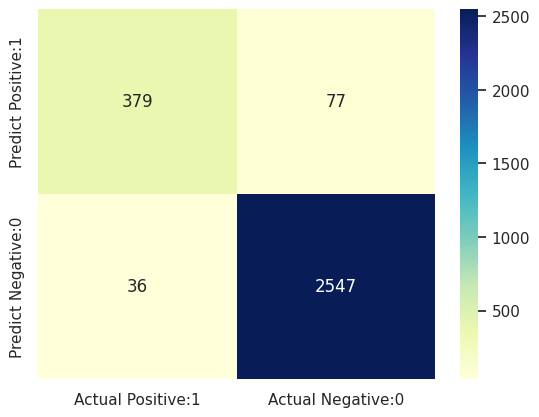

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#*16.Classification Report*

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       456
           1       0.97      0.99      0.98      2583

    accuracy                           0.96      3039
   macro avg       0.94      0.91      0.92      3039
weighted avg       0.96      0.96      0.96      3039



#*17.Findings*

From my interpretation, I founded out that,

1.From the overall customer data, there are **16.1% customers are churned customers**.

2.In Gender, the **female** are more churned compared to male, **57.2% of females** are churned where **male are 42.8%** .

3.In Educational Level, **Graduate** are more churned with **45.7%** .

4.In Marital Status, **Married** are more churned with **51.5%** followed by **Single** with **41.1%** .

5.In Income Category, Who are earning **Less than $40k** are more churned with **49.1%** .

6.In Card Category, **Blue card holders** are majorly churned with **93.4%** .

7.In Age category, who all are between the range of **45 to 55** years old are more churned with **42.3%** followed by the age range between **35 to 55** with **37.2%** .

These are the insights that I interpreted from analyzing the categories of customers.

#*18.Business Recommendations*

1.**Overall churn rate (16.1%):** Implement a comprehensive customer loyalty program that includes personalized rewards, exclusive offers, and frequent engagement to retain existing customers and win back churned ones.

2.**Gender (57.2% female churned, 42.8% male churned):** Develop specific programs and services that cater to the needs and preferences of female customers, such as financial planning services or products tailored for women.

3.**Educational Level (45.7% graduates churned):** Offer career advancement and financial education workshops that appeal to graduates, addressing their unique needs and helping them manage their finances better.

4.**Marital Status (51.5% married churned, 41.1% single churned):** Introduce family-oriented banking products and benefits, such as joint accounts with perks, family savings plans, and family-oriented financial services.

5.**Income Category (49.1% earning less than $40k churned):** Provide financial literacy programs, low-fee accounts, or special financial products designed to support low-income customers and help them manage their finances more effectively.

6.**Card Category (93.4% Blue card holders churned):** Review and enhance the benefits associated with the Blue card. Consider adding more attractive features or rewards and launching a targeted loyalty program for Blue cardholders.

7.**Age Category (42.3% churned aged 45-55, 37.2% churned aged 35-55):** Create age-specific financial planning and retirement preparation services that address the needs and concerns of customers aged 35-55, helping them achieve their financial goals.

#*19.Conclusion*


       Accuracy - 96.28%
       True Positive - 2547
       True Negative - 397
